<a href="https://colab.research.google.com/github/Kridr/HW_MMDA_HSE/blob/main/HW1_MMDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework #1: Clustering methods

Completed by: Lyalikov Nikita (мИИАД22)

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn.cluster
import skimage.io as io
import matplotlib.pyplot as plt
import os
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import calinski_harabasz_score, silhouette_score

# Task 1

Uploading image from web

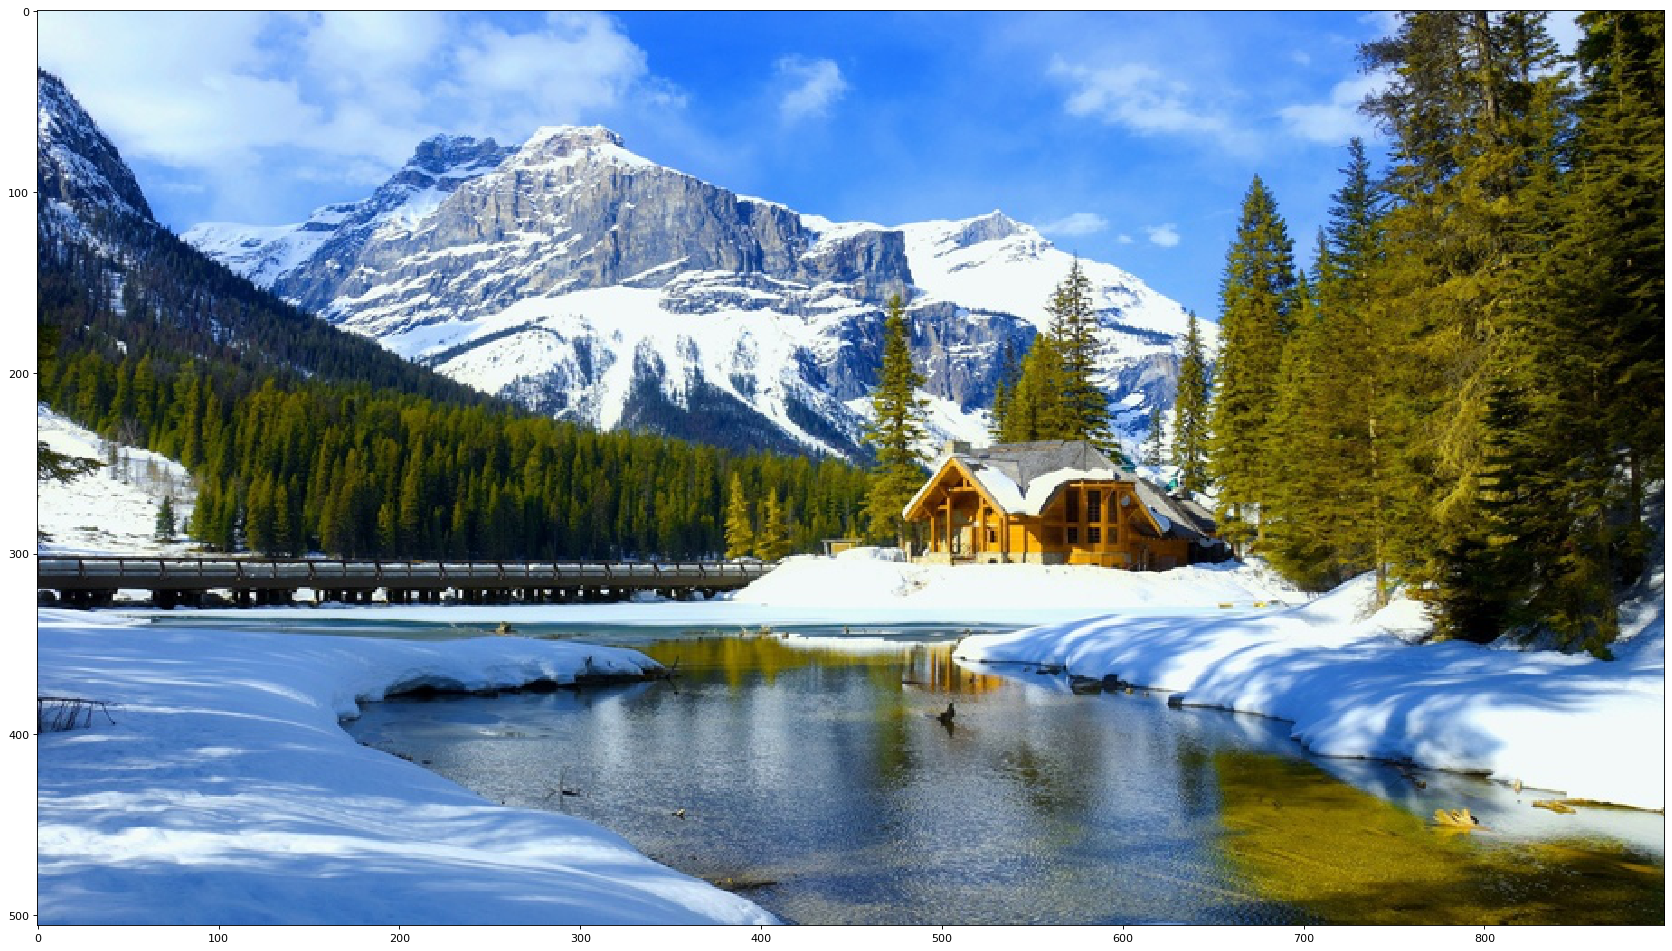

In [2]:
image = io.imread('https://www.look.com.ua/large/201601/144014.jpg')
io.imsave('image.png', image)
plt.figure(figsize=(25, 12), dpi=80)
io.imshow(image)
plt.show()

Printing image size

In [3]:
print(os.stat('image.png').st_size)

870087


Preparing features for further clustering

In [4]:
feat_image = image.reshape(-1, 3)
feat_image

array([[223, 244, 249],
       [223, 244, 249],
       [223, 244, 249],
       ...,
       [ 30,  36,   2],
       [ 33,  39,   5],
       [ 29,  35,   1]], dtype=uint8)

Performing clustering of given image

In [5]:
clust = sklearn.cluster.KMeans(n_clusters=10)
clust.fit(feat_image)

KMeans(n_clusters=10)

Printing clusters' centroids

In [6]:
clust.cluster_centers_

array([[136.68841505, 154.7934067 , 173.64874226],
       [ 72.28607526,  67.64499638,  15.64797367],
       [228.63607445, 241.37397753, 244.28476388],
       [ 88.69785326, 109.71206377, 130.68500747],
       [164.97586863, 197.408022  , 236.47043667],
       [123.38222978, 109.86691965,  23.67747317],
       [ 43.23714865,  65.12993796,  91.44906938],
       [ 90.82252117, 156.99900725, 247.29018599],
       [ 84.79620356, 129.65689997, 192.72239432],
       [ 24.07831863,  28.35721939,  17.71981358]])

Compressing image replacing each pixel with its cluster centroid

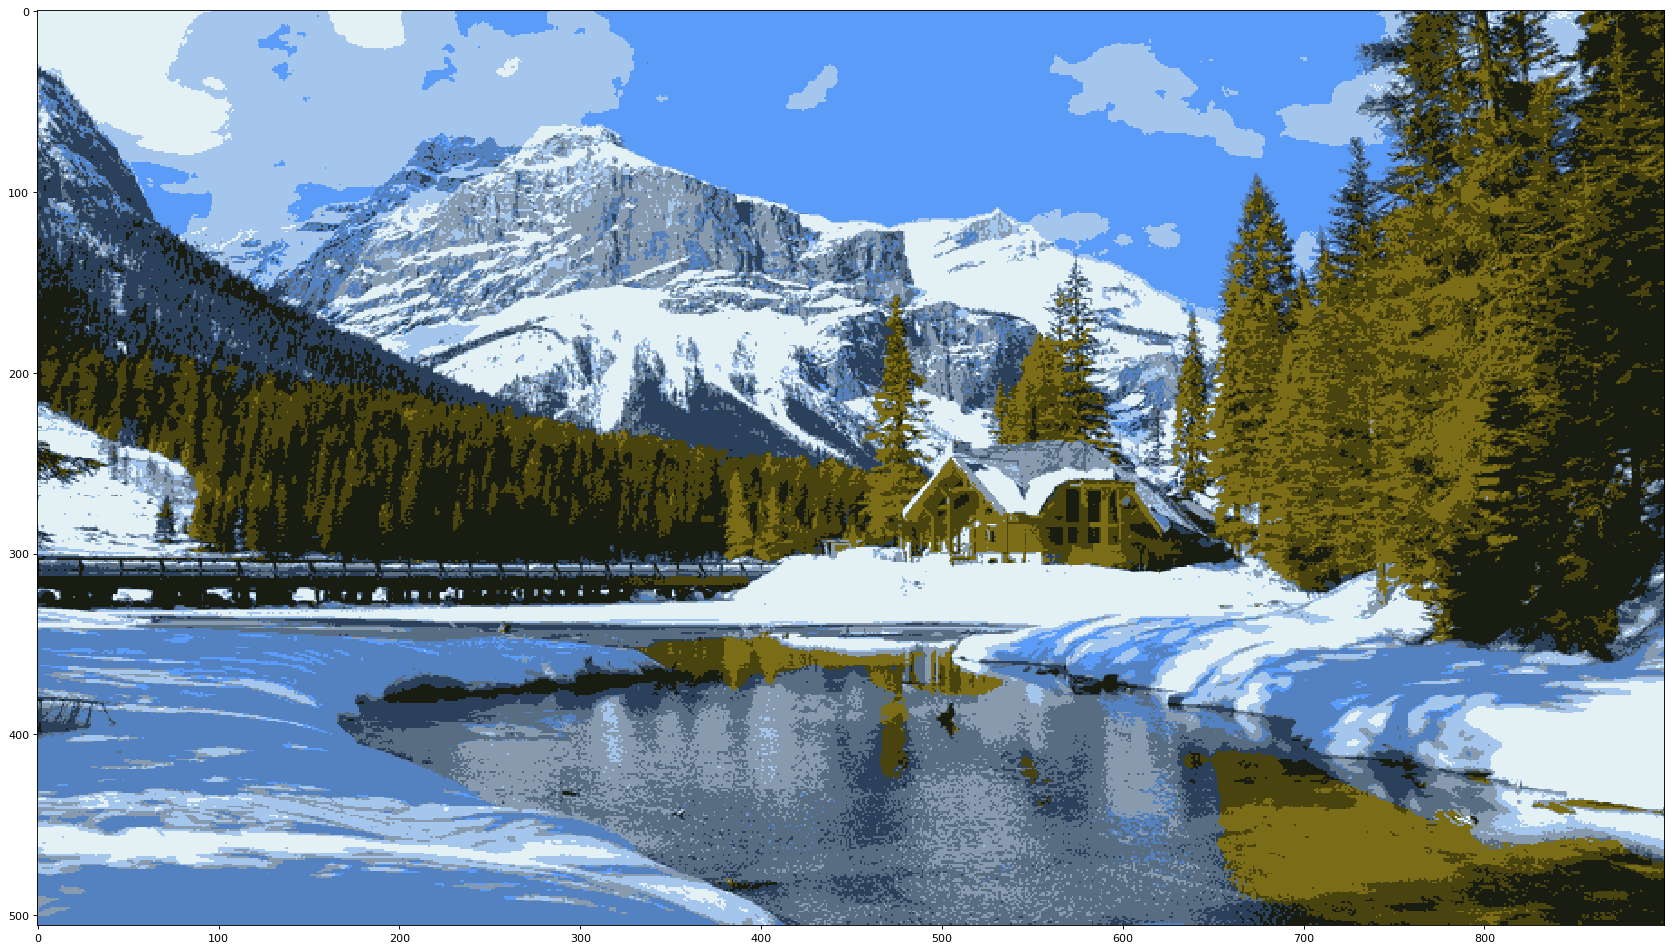

In [7]:
compressed_image = clust.cluster_centers_[clust.labels_]
compressed_image = compressed_image.reshape(image.shape)
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
io.imsave('compressed_image.png', compressed_image)

plt.figure(figsize=(25, 12), dpi=80)
io.imshow(compressed_image)
plt.show()

Printing size of compressed image

In [8]:
print(os.stat('compressed_image.png').st_size)

125485


## Summary

Compressing works really well on the above image (if we do not consider a house) even with just 10 clusters. We can also see that we have significantly decreased the size of the image (in bytes)

In [9]:
decr_times = os.stat('image.png').st_size / os.stat('compressed_image.png').st_size
print(f'We have reduced the image size by {decr_times} times')

We have reduced the image size by 6.933792883611587 times


# Task 2

Reading data

In [10]:
df_2 = pd.read_csv('https://www.dropbox.com/s/wi1som52h8vo6ez/elbow.txt?dl=1', sep='\t', header=None, names=['x', 'y'], decimal=',')
df_2.head()

,x,y
0,-2.747711,3.575680
1,-1.939473,1.658946
2,-2.264922,2.754515
3,-1.963531,3.247520
4,-1.379661,2.885197


Visualizing data

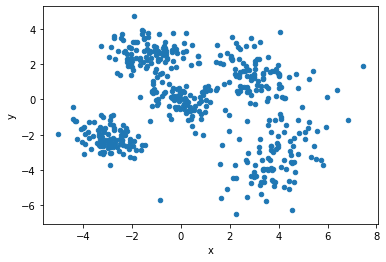

In [11]:
df_2.plot('x', 'y', kind='scatter')
plt.show()

Performing elbow method (+ visualization)

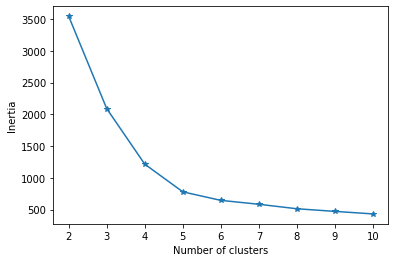

In [12]:
Js = []
n_c = []
chs = []
s = []

for n_clusters in range(2, 11):
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
    kmeans.fit(df_2)

    n_c.append(n_clusters)
    Js.append(kmeans.inertia_)
    chs.append(calinski_harabasz_score(df_2, kmeans.labels_))
    s.append(silhouette_score(df_2, kmeans.labels_))

Js = np.array(Js)

plt.plot(n_c, Js, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Repeating the search of optimal number of clusters using Silhouette score

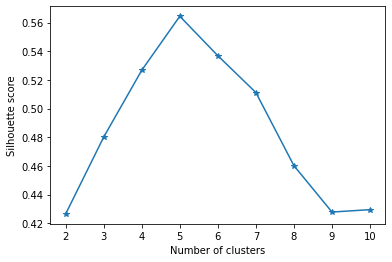

In [13]:
plt.plot(n_c, s, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Repeating the search of optimal number of clusters using Calinski Harabasz score

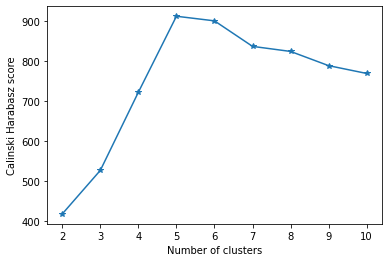

In [14]:
plt.plot(n_c, chs, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz score')
plt.show()

## Summary

Both approaches shows us the same result: we actually have 5 clusters. Using visualization of data we can say that this is true.

In my opinion, for this specific task it is better to use Calinski Harabasz or Silhouette because it is easier to interpret

# Task 3

Reading data

In [15]:
df_3 = pd.read_csv('https://www.dropbox.com/s/5xhgus2ak48wi9l/nutrient.dat?dl=1', 
                   sep='\s{2,}', 
                   index_col='type',
                   header=None,
                   names=['type', 'energy values', 'protein', 'fats', 'calcium', 'iron']
)
df_3.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,energy values,protein,fats,calcium,iron
type,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


## Clustering of objects

Performing aglomerative clustering with `single` type of linkage

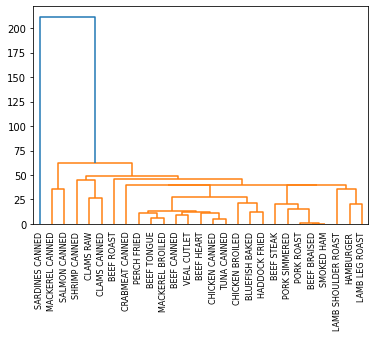

In [16]:
l3_obj_single = linkage(df_3, method='single', metric='euclidean')
dendrogram(
    l3_obj_single,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=df_3.index,
    #p=4,
    #truncate_mode='lastp'
)
plt.show()

This clustering proposes dividing all objects into two parts. First cluster consists only "Sardines Canned". The rest objects are in the second cluster.

Performing aglomerative clustering with `complete` type of linkage

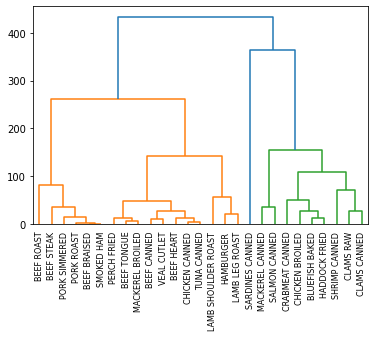

In [17]:
l3_obj_complete = linkage(df_3, method='complete', metric='euclidean')
dendrogram(
    l3_obj_complete,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=df_3.index,
    #p=20,
    #truncate_mode='lastp'
)
plt.show()

Above clustering looks much better: it divides data into 3 clusters. The first cluster mostly has different types of meat in it. The second cluster has just one object - "Sardines Canned". And the third cluster mostly has different types of seafood.

Performing aglomerative clustering with `average` type of linkage

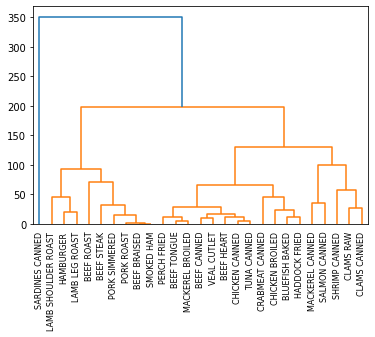

In [18]:
l3_obj_average = linkage(df_3, method='average', metric='euclidean')
dendrogram(
    l3_obj_average,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=df_3.index,
    #p=20,
    #truncate_mode='lastp'
)
plt.show()

This clustering proposes dividing all objects into two parts. First cluster consists only "Sardines Canned". The rest objects are in the second cluster.

## Clustering of features

Performing aglomerative clustering of `energy values` feature

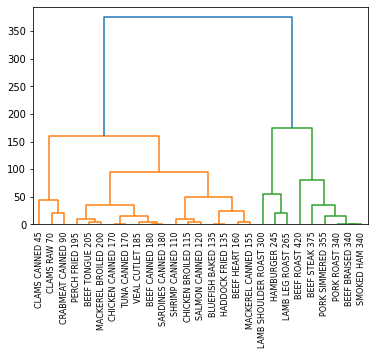

In [19]:
l3_feat_energy_values = linkage(df_3['energy values'].to_numpy().reshape(-1, 1), method='complete', metric='euclidean')
energy_values_labels = df_3.index + ' ' + df_3['energy values'].to_numpy().astype(str)
dendrogram(
    l3_feat_energy_values,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=energy_values_labels,
    #p=20,
    #truncate_mode='lastp'
)
plt.show()

Clustering of `energy values` feature gave us 2 clusters. First cluster consists of entities with big energy values. All of them are different kinds of meat. And the second cluster consists of low energy values entities: usually seafood and sometimes meat

Performing aglomerative clustering of `protein` feature

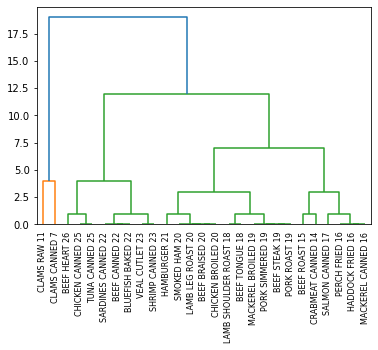

In [20]:
l3_feat_protein = linkage(df_3['protein'].to_numpy().reshape(-1, 1), method='complete', metric='euclidean')
protein_labels = df_3.index + ' ' + df_3['protein'].to_numpy().astype(str)
dendrogram(
    l3_feat_protein,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=protein_labels,
    #p=20,
    #truncate_mode='lastp'
)
plt.show()

Clustering of `protein` feature gave us two clusters. The first cluster contains of different type of clams, which has extremely low amount of protein in it. And the second cluster has all other entities.

Performing aglomerative clustering of `fats` feature

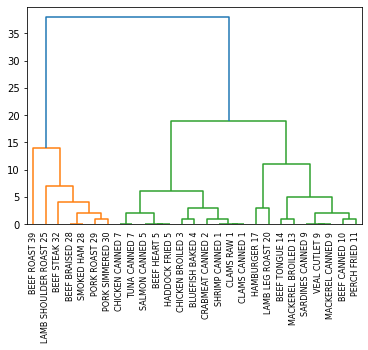

In [21]:
l3_feat_fats = linkage(df_3['fats'].to_numpy().reshape(-1, 1), method='complete', metric='euclidean')
fats_labels = df_3.index + ' ' + df_3['fats'].to_numpy().astype(str)
dendrogram(
    l3_feat_fats,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=fats_labels,
    #p=20,
    #truncate_mode='lastp'
)
plt.show()

Clustering of `fats` feature looks like clustering of `energy values` feature.

Performing aglomerative clustering of `calcium` feature

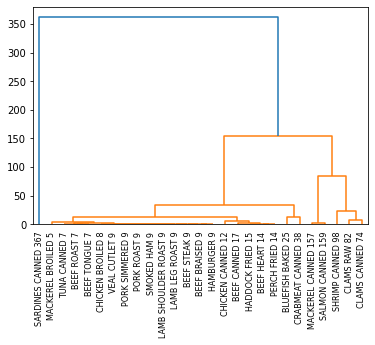

In [22]:
l3_feat_calcium = linkage(df_3['calcium'].to_numpy().reshape(-1, 1), method='complete', metric='euclidean')
calcium_labels = df_3.index + ' ' + df_3['calcium'].to_numpy().astype(str)
dendrogram(
    l3_feat_calcium,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=calcium_labels,
    #p=20,
    #truncate_mode='lastp'
)
plt.show()

Clustering of `calcuim` feature gave us two clusters. But I would like to divide it into 3 clusters. First cluster contains only one entity which has extremely big value and it corresponds to sardines canned. 

The second cluster is right branch of orange subdendrogram. It has several entites with big values of the feature. This cluster has different types of seafood.

The third cluster is left brach of orange subdendrogram. It has different types of meat and several seafood entites, which all has low value of feature.

Performing aglomerative clustering of `iron` feature

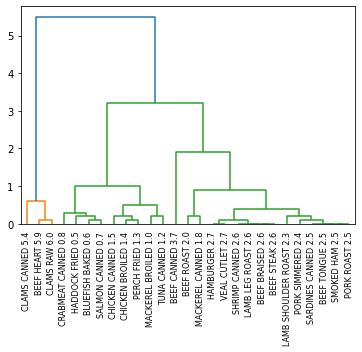

In [23]:
l3_feat_iron = linkage(df_3['iron'].to_numpy().reshape(-1, 1), method='complete', metric='euclidean')
iron_labels = df_3.index + ' ' + df_3['iron'].to_numpy().astype(str)
dendrogram(
    l3_feat_iron,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=iron_labels,
    #p=20,
    #truncate_mode='lastp'
)
plt.show()

Clustering of `iron` feature gave us two clusters. It looks like clustering of `protein` feature, but first cluster consists of not only clams but also beef heart.

## Summary

The best linkage type for objects' clusterization is `complete`, because it represents our data the best way.

Clustering of features helped us to understand the reasons of getting such objects' clusters more deeply 